In [13]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [14]:
df = pd.read_csv('/Users/southrussian/Downloads/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [15]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

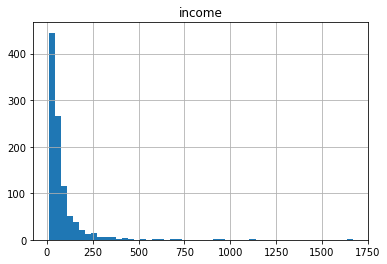

In [16]:
df.hist(column='income', bins=50)

In [17]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [18]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire']]
X[0:5]

,region,tenure,age,marital,address,income,ed,employ,retire
0,2,13,44,1,9,64.0,4,5,0.0
1,3,11,33,1,7,136.0,5,5,0.0
2,3,68,52,1,24,116.0,1,29,0.0
3,2,33,33,0,12,33.0,2,0,0.0
4,2,23,30,1,9,30.0,1,2,0.0


In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644]])

In [21]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (800, 9) (800,)
Test set: (200, 9) (200,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
k = 4
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [25]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 3, 3, 4, 2])

In [26]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5275
Test set Accuracy:  0.365


In [27]:
k = 6
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat2 = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

Train set Accuracy:  0.495
Test set Accuracy:  0.365


In [29]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

 #Train Model and Predict
 neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
 yhat=neigh.predict(X_test)
 mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

 std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.36 , 0.34 , 0.355, 0.365, 0.375, 0.385, 0.35 , 0.36 , 0.37 ,
       0.36 , 0.365, 0.365, 0.365, 0.385, 0.39 , 0.37 , 0.39 , 0.385,
       0.365, 0.355, 0.345, 0.35 , 0.355, 0.365, 0.385, 0.34 , 0.37 ,
       0.36 , 0.355, 0.335, 0.355, 0.325, 0.36 , 0.35 , 0.345, 0.375,
       0.36 , 0.35 , 0.355, 0.365, 0.38 , 0.38 , 0.355, 0.37 , 0.36 ,
       0.37 , 0.36 , 0.36 , 0.365, 0.375, 0.365, 0.37 , 0.38 , 0.385,
       0.37 , 0.385, 0.395, 0.39 , 0.37 , 0.37 , 0.36 , 0.38 , 0.36 ,
       0.355, 0.365, 0.335, 0.365, 0.36 , 0.37 , 0.37 , 0.365, 0.38 ,
       0.38 , 0.385, 0.375, 0.395, 0.375, 0.395, 0.4  , 0.385, 0.375,
       0.37 , 0.37 , 0.375, 0.38 , 0.385, 0.395, 0.385, 0.38 , 0.375,
       0.37 , 0.38 , 0.375, 0.38 , 0.395, 0.385, 0.38 , 0.355, 0.385])

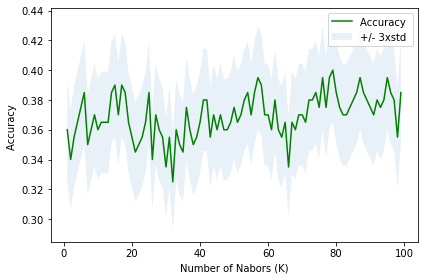

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.4 with k= 79
